# <font color=purple>You can do THAT with Python?</font>
@techtogether, Boston University, March 23, 2019<br>
Rebecca Perry, PhD, Senior Engineering Manager @Wayfair<br>

# Get information from the web

Demonstrate uses of Python for requesting info from the web.

astronaut info: http://open-notify.org/Open-Notify-API/People-In-Space/

mbta info: https://www.mbta.com/developers/v3-api

requests package: http://docs.python-requests.org/en/master/
alternatively use http.client: https://docs.python.org/3/library/http.client.html

In [1]:
#here's what happens if you try to use functionality that you haven't imported

#astronaut info
astrodata = requests.get('http://api.open-notify.org/astros.json')
print(astrodata.json())

NameError: name 'requests' is not defined

In [2]:
import requests
import pprint

#astronaut info
astrodata = requests.get('http://api.open-notify.org/astros.json')
print(astrodata.json())

{'message': 'success', 'number': 6, 'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'David Saint-Jacques'}, {'craft': 'ISS', 'name': 'Anne McClain'}, {'craft': 'ISS', 'name': 'Alexey Ovchinin'}, {'craft': 'ISS', 'name': 'Nick Hague'}, {'craft': 'ISS', 'name': 'Christina Koch'}]}


In [3]:
print('There are {} people in space'.format(astrodata.json()['number']))

There are 6 people in space


In [4]:
for astronaut in astrodata.json()['people']:
    print(astronaut['name'])

Oleg Kononenko
David Saint-Jacques
Anne McClain
Alexey Ovchinin
Nick Hague
Christina Koch


In [5]:
#mbta info
mbta = 'https://api-v3.mbta.com'

#get station names
response = requests.get(mbta+'/stops?filter[route_type]=0,1')
stops = response.json()
#id, platform_name
station_ids = [(int(stop['id']),
               stop['attributes']['description']) for stop in stops['data']]
station_ids.sort()
for station_name in station_ids:
    print(station_name)

(70001, 'Forest Hills - Orange Line')
(70002, 'Green Street - Orange Line - Forest Hills')
(70003, 'Green Street - Orange Line - Oak Grove')
(70004, 'Stony Brook - Orange Line - Forest Hills')
(70005, 'Stony Brook - Orange Line - Oak Grove')
(70006, 'Jackson Square - Orange Line - Forest Hills')
(70007, 'Jackson Square - Orange Line - Oak Grove')
(70008, 'Roxbury Crossing - Orange Line - Forest Hills')
(70009, 'Roxbury Crossing - Orange Line - Oak Grove')
(70010, 'Ruggles - Orange Line - Forest Hills')
(70011, 'Ruggles - Orange Line - Oak Grove')
(70012, 'Massachusetts Avenue - Orange Line - Forest Hills')
(70013, 'Massachusetts Avenue - Orange Line - Oak Grove')
(70014, 'Back Bay - Orange Line - Forest Hills')
(70015, 'Back Bay - Orange Line - Oak Grove')
(70016, 'Tufts Medical Center - Orange Line - Forest Hills')
(70017, 'Tufts Medical Center - Orange Line - Oak Grove')
(70018, 'Chinatown - Orange Line - Forest Hills')
(70019, 'Chinatown - Orange Line - Oak Grove')
(70020, 'Downtown

In [6]:
#select station ID for Boston University West - Green Line - Inbound
stop = '70142'

mbtadata = requests.get(mbta+'/predictions?filter[stop]={}'
                    '&page[limit]=5'.format(stop))
print(mbtadata.json())

{'data': [{'attributes': {'arrival_time': '2019-03-23T15:28:26-04:00', 'departure_time': '2019-03-23T15:29:02-04:00', 'direction_id': 1, 'schedule_relationship': 'ADDED', 'status': None, 'stop_sequence': 140}, 'id': 'prediction-ADDED-1552923562-70142-140', 'relationships': {'route': {'data': {'id': 'Green-B', 'type': 'route'}}, 'stop': {'data': {'id': '70142', 'type': 'stop'}}, 'trip': {'data': {'id': 'ADDED-1552923562', 'type': 'trip'}}}, 'type': 'prediction'}, {'attributes': {'arrival_time': '2019-03-23T15:35:44-04:00', 'departure_time': '2019-03-23T15:36:20-04:00', 'direction_id': 1, 'schedule_relationship': 'ADDED', 'status': None, 'stop_sequence': 140}, 'id': 'prediction-ADDED-1552923568-70142-140', 'relationships': {'route': {'data': {'id': 'Green-B', 'type': 'route'}}, 'stop': {'data': {'id': '70142', 'type': 'stop'}}, 'trip': {'data': {'id': 'ADDED-1552923568', 'type': 'trip'}}}, 'type': 'prediction'}, {'attributes': {'arrival_time': '2019-03-23T15:43:24-04:00', 'departure_time

In [7]:
pprint.pprint(mbtadata.json())

{'data': [{'attributes': {'arrival_time': '2019-03-23T15:28:26-04:00',
                          'departure_time': '2019-03-23T15:29:02-04:00',
                          'direction_id': 1,
                          'schedule_relationship': 'ADDED',
                          'status': None,
                          'stop_sequence': 140},
           'id': 'prediction-ADDED-1552923562-70142-140',
           'relationships': {'route': {'data': {'id': 'Green-B',
                                                'type': 'route'}},
                             'stop': {'data': {'id': '70142', 'type': 'stop'}},
                             'trip': {'data': {'id': 'ADDED-1552923562',
                                               'type': 'trip'}}},
           'type': 'prediction'},
          {'attributes': {'arrival_time': '2019-03-23T15:35:44-04:00',
                          'departure_time': '2019-03-23T15:36:20-04:00',
                          'direction_id': 1,
                          's

In [8]:
for train in mbtadata.json()['data']:
    arrivaltime = train['attributes']['arrival_time']
    arrivaltime = arrivaltime.split('T')[1].split('-')[0]
    print('Train expected at: ', arrivaltime)

Train expected at:  15:28:26
Train expected at:  15:35:44
Train expected at:  15:43:24
Train expected at:  15:46:42


# Read and plot data

Demonstrates use of Python for reading and plotting data from csv file.

csv reading based on: https://realpython.com/python-csv/

The csv, collections, and pprint modules are part of the Python Standard Library.

matplotlib: https://matplotlib.org/
*bundled with scientific distributions of Python such as Anaconda https://www.anaconda.com/

The sample csv file used in this example is available at:
https://drive.google.com/drive/folders/1giaGOhJYWIXfZzy-zxmbrUIOB9Y_ROdu

In [9]:
import csv
from collections import Counter
import matplotlib.pyplot as plt
import pprint

In [10]:
#NOTE: for Python to find the csv file, you must CD (change directory) to the
#directory containing the downloaded csv file or modify the csvfile variable
#to be the full filepath for the csv file

#sample csv is the 2018 Python Developer's Survey
csvfile = 'python_psf_external_18.csv'

In [11]:
#import some of the data from the csv into a list
usecase_responses = []
with open(csvfile) as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            questions = [question for question in row]
            pprint.pprint(questions)
            usecase_index = questions.index('What do you use Python for the most?')
            line_count += 1
        else:
            usecase_responses.append(row[usecase_index])
            line_count += 1
    print('\nProcessed {} lines.'.format(line_count))

['',
 'Is Python the main language you use for your current projects?',
 'None:What other language(s) do you use?',
 'Java:What other language(s) do you use?',
 'JavaScript:What other language(s) do you use?',
 'C/C++:What other language(s) do you use?',
 'PHP:What other language(s) do you use?',
 'C#:What other language(s) do you use?',
 'Ruby:What other language(s) do you use?',
 'Bash / Shell:What other language(s) do you use?',
 'Objective-C:What other language(s) do you use?',
 'Go:What other language(s) do you use?',
 'Visual Basic:What other language(s) do you use?',
 'Scala:What other language(s) do you use?',
 'SQL:What other language(s) do you use?',
 'Kotlin:What other language(s) do you use?',
 'R:What other language(s) do you use?',
 'Swift:What other language(s) do you use?',
 'Clojure:What other language(s) do you use?',
 'Perl:What other language(s) do you use?',
 'Rust:What other language(s) do you use?',
 'Groovy:What other language(s) do you use?',
 'TypeScript:What 

 'Ninja-IDE:What editors/IDEs do you usefor Python development in addition to '
 'your main ide/editor?',
 'Komodo Editor:What editors/IDEs do you usefor Python development in addition '
 'to your main ide/editor?',
 'Komodo IDE:What editors/IDEs do you usefor Python development in addition to '
 'your main ide/editor?',
 'Wing IDE:What editors/IDEs do you usefor Python development in addition to '
 'your main ide/editor?',
 'TextMate:What editors/IDEs do you usefor Python development in addition to '
 'your main ide/editor?',
 'None:What editors/IDEs do you usefor Python development in addition to your '
 'main ide/editor?_1',
 'Other  Write In::What editors/IDEs do you usefor Python development in '
 'addition to your main ide/editor?',
 'Do youregularly work on multiple projects at the same time?',
 'use autocompletion  in your editor:When developing in Python, how often do '
 'you ?',
 'use a debugger:When developing in Python, how often do you ?',
 'refactor your code:When develop

In [12]:
print(usecase_responses)

['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA

In [13]:
#how many responses were for each Python use case
usecase_counts = Counter(usecase_responses)
pprint.pprint(usecase_counts)

Counter({'Web development': 4364,
         'NA': 3588,
         'Data analysis': 2800,
         'Machine learning': 1785,
         'DevOps / System administration / Writing automation scripts': 1738,
         'Educational purposes': 1191,
         'Other - Write In:': 872,
         'Desktop development': 685,
         'Software prototyping': 630,
         'Programming of web parsers / scrapers / crawlers': 595,
         'Software testing / Writing automated tests': 560,
         'Network programming': 457,
         'Embedded development': 198,
         'Game development': 158,
         'Computer graphics': 94,
         'Multimedia applications development': 70,
         'Mobile development': 50})


In [14]:
Counter?

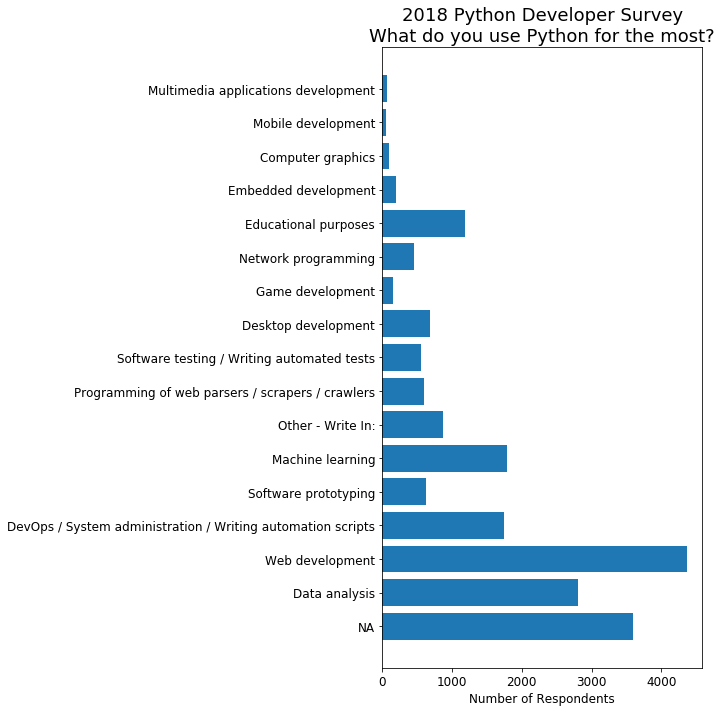

In [15]:
#create a histogram

#how many different use cases were there?
n_usecases = len(usecase_counts)

plt.figure(figsize=(10, 10))
plt.barh(range(n_usecases), list(usecase_counts.values()))
plt.xticks(fontsize=12)
plt.yticks(range(n_usecases), list(usecase_counts.keys()),
           rotation='horizontal', fontsize=12)
plt.xlabel('Number of Respondents', fontsize=12)
plt.title('2018 Python Developer Survey\n'
          'What do you use Python for the most?', fontsize=18)
plt.tight_layout()
plt.show()

# Solve math problems

Demonstrates use of Python for symbolic math using the SymPy package.

SymPy: https://www.sympy.org/en/index.html

matplotlib: https://matplotlib.org/
*bundled with scientific distributions of Python such as Anaconda https://www.anaconda.com/

Examples of using the SymPy package to solve equations and calculate
derivatives.

In [16]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import IPython.display

#sympy.init_printing(use_unicode=True)
sympy.init_printing(use_latex='mathjax')

x, y = sympy.symbols('x y')

In [17]:
#solve an eqaution for x
xval = sympy.solve(sympy.Eq(x+5, 0), x)

# most of the lines here are to print results nicely
# very few lines are needed for the actual computation
print('\nsolve for x:')
IPython.display.display(sympy.Eq(x+5, 0))
print('\nx is equal to')
IPython.display.display(xval)


solve for x:


x + 5 = 0


x is equal to


[-5]

In [18]:
#solve another equation for x
xval = sympy.solve(sympy.Eq(x**2, 2), x)
print('\nsolve for x:')
IPython.display.display(sympy.Eq(x**2, 2))
print('x is equal to')
IPython.display.display(xval)


solve for x:


 2    
x  = 2

x is equal to


[-√2, √2]

In [19]:
#solve an equation for y
equation = sympy.Eq(x, 2*y+5)
yexpression = sympy.solve(equation, y)
print('\nsolve for y:')
IPython.display.display(equation)
print('\ny is equal to:')
IPython.display.display(yexpression)


solve for y:


x = 2⋅y + 5


y is equal to:


⎡x   5⎤
⎢─ - ─⎥
⎣2   2⎦

In [20]:
#take the derivative of a trig function
equation = sympy.sin(x)
deriv = sympy.diff(equation, x)
print('\nThe derivative of')
IPython.display.display(equation)
print('is')
IPython.display.display(deriv)


The derivative of


sin(x)

is


cos(x)

In [21]:
#take the derivative of another expression
equation = sympy.exp(x**2)
deriv = sympy.diff(equation, x)
print('\nThe derivative of')
IPython.display.display(equation)
print('is')
IPython.display.display(deriv)


The derivative of


 ⎛ 2⎞
 ⎝x ⎠
ℯ    

is


     ⎛ 2⎞
     ⎝x ⎠
2⋅x⋅ℯ    

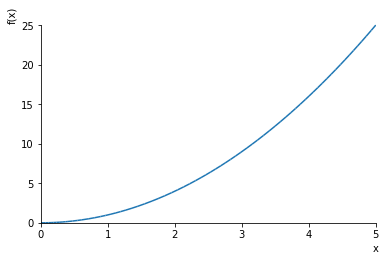

In [22]:
sympy.plot(x**2,(x,0,5))

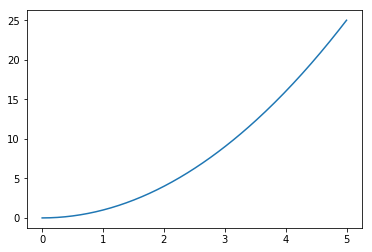

In [23]:
x = np.linspace(0,5,200)
plt.plot(x,x**2)
plt.show()

# Modify colors in images

Demonstrates that digital images are arrays of numbers than can be modified with NumPy.

NumPy: http://www.numpy.org/

matplotlib: https://matplotlib.org/
*bundled with scientific distributions of Python such as Anaconda https://www.anaconda.com/
 
imageio: https://imageio.github.io/    

Looking for good color combinations for a presentation? Want to be colorblind friendly?<br>
http://colorbrewer2.org

In [24]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as img
import pprint

Image([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

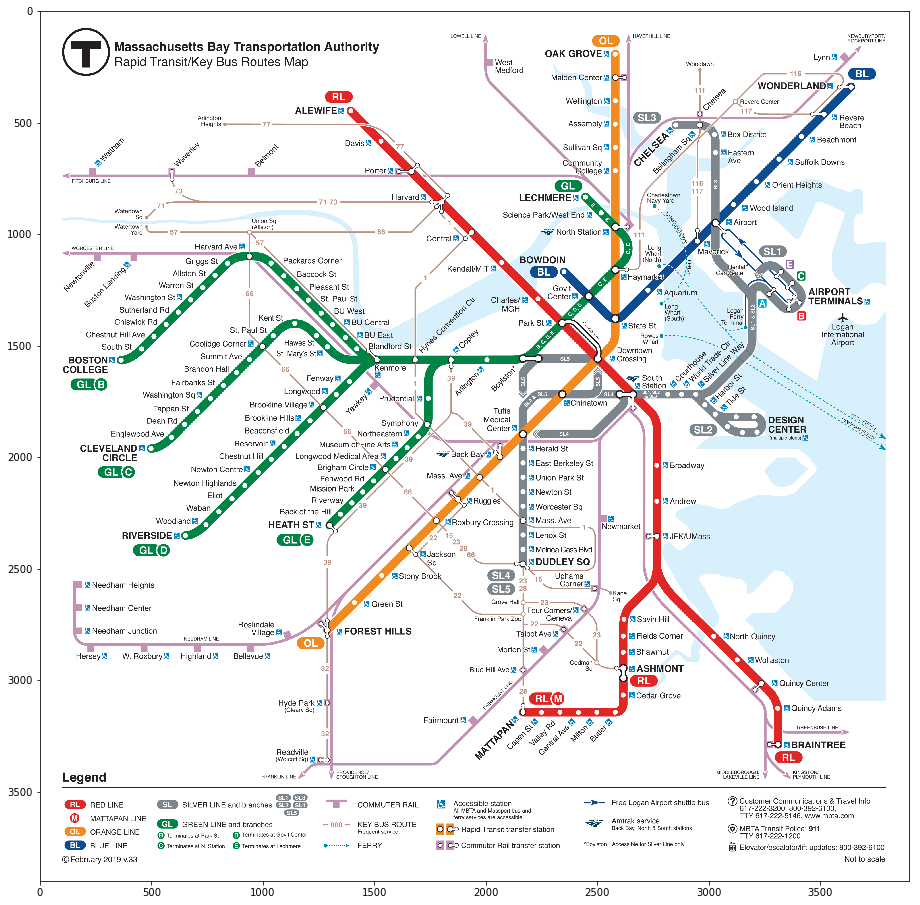

In [25]:
mbtamap = imageio.imread('mbta.png')
pprint.pprint(mbtamap)
print(np.shape(mbtamap))
plt.figure(figsize=(16,16))
plt.imshow(mbtamap)
plt.show()

In [26]:
mbtared = [225, 39, 38]
mbtablue = [15, 75, 145]
mbtaorange = [241, 139, 33]
mbtagreen = [0, 132, 69]
mbtagray = [125, 134, 140]

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


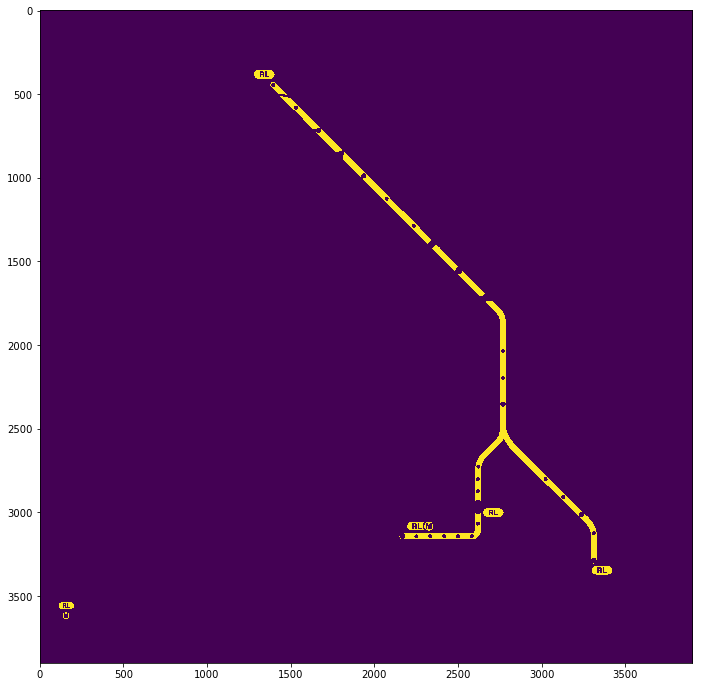

In [27]:
redmask = np.all(mbtamap==mbtared, axis=2)
print(redmask)
plt.figure(figsize=[12,12])
plt.imshow(redmask)
plt.show()

In [28]:
bluemask = np.all(mbtamap==mbtablue, axis=2)
orangemask = np.all(mbtamap==mbtaorange, axis=2)
greenmask =  np.all(mbtamap==mbtagreen, axis=2)

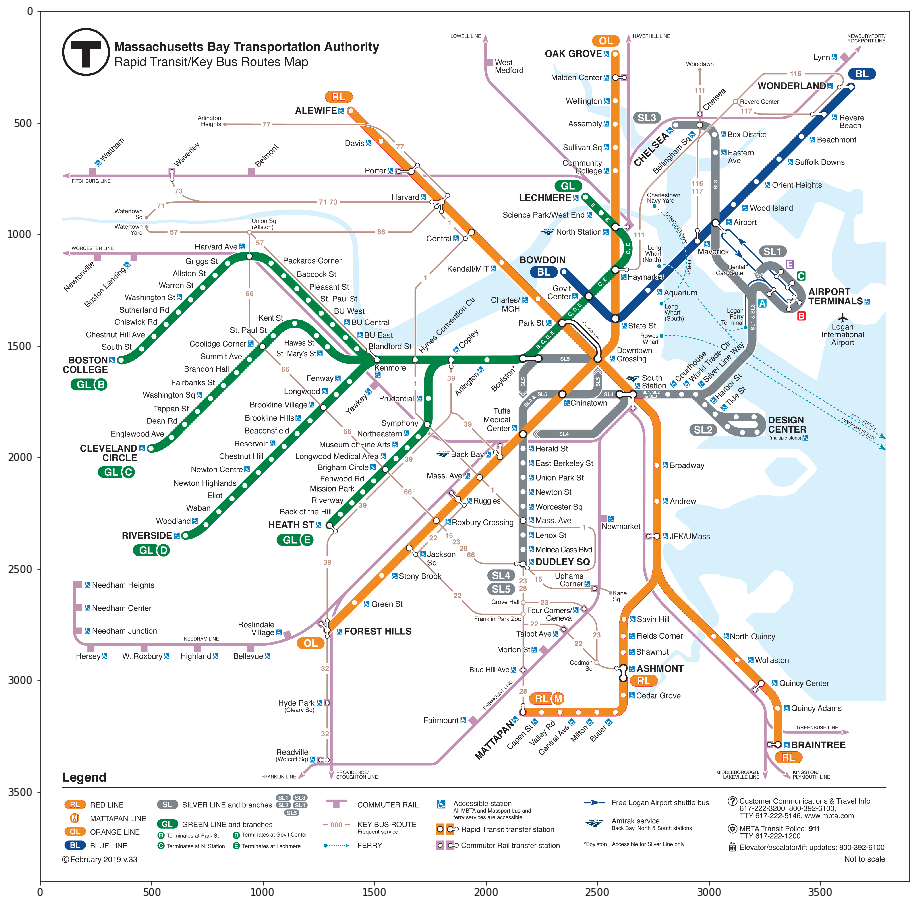

In [29]:
mbtamap[redmask] = mbtaorange
plt.figure(figsize=(16,16))
plt.imshow(mbtamap)
plt.show()

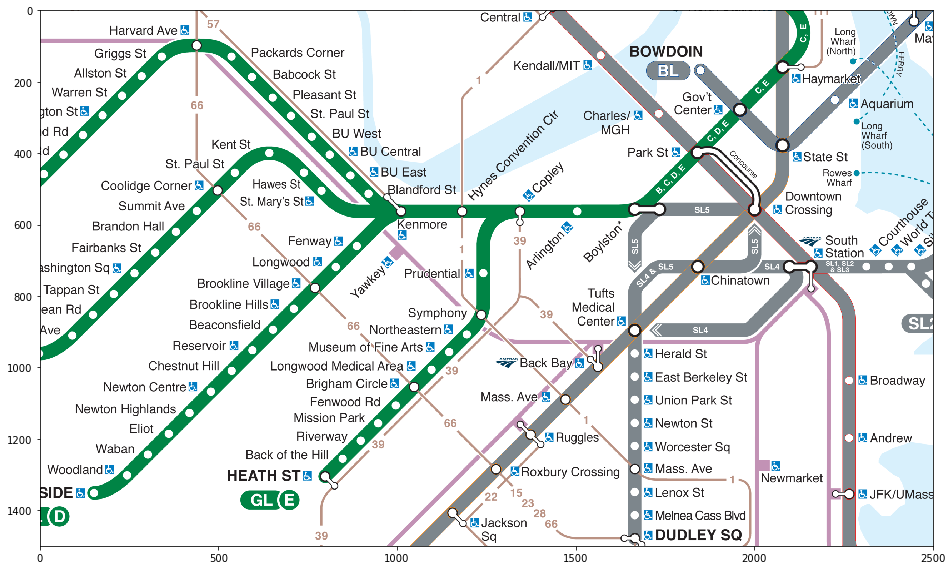

In [30]:
gray = mbtagray
mbtamap[redmask] = mbtagray
mbtamap[orangemask] = mbtagray
mbtamap[bluemask] = mbtagray
plt.figure(figsize=(16,16))
plt.imshow(mbtamap[1000:2500, 500:3000])
plt.show()

# Find faces in images

Demonstrates the use of opencv's machine learning model for recognizing faces and eyes.

From: https://docs.opencv.org/3.4.3/d7/d8b/tutorial_py_face_detection.html

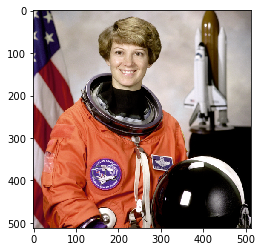

In [31]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

#replace with path to the haarcascades xml files on your own computer
haardir = '/home/becca/anaconda3/share/OpenCV/haarcascades'
face_cascade = cv.CascadeClassifier(haardir + os.sep + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(haardir + os.sep + 'haarcascade_eye.xml')

#im = imageio.imread('imageio:chelsea.png')
im = imageio.imread('imageio:astronaut.png')
plt.imshow(im)
plt.show()

In [32]:
#convert to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [33]:
#add rectangles to faces found
for (x,y,w,h) in faces:
    cv.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = im[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

Astronaut Eileen Collins


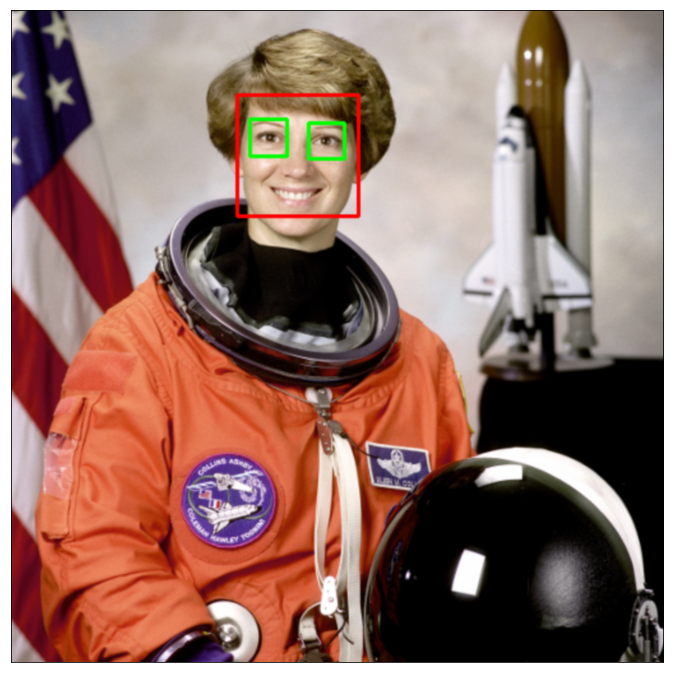

In [34]:
print('Astronaut Eileen Collins')
plt.figure(figsize=(12,12))
plt.imshow(im, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
from PIL import Image
import requests

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Stephanie_Wilson_in_2008.jpg/440px-Stephanie_Wilson_in_2008.jpg'
im = imageio.imread(imageio.core.urlopen(url).read(), '.jpg')

Astronaut Stehanie Wilson


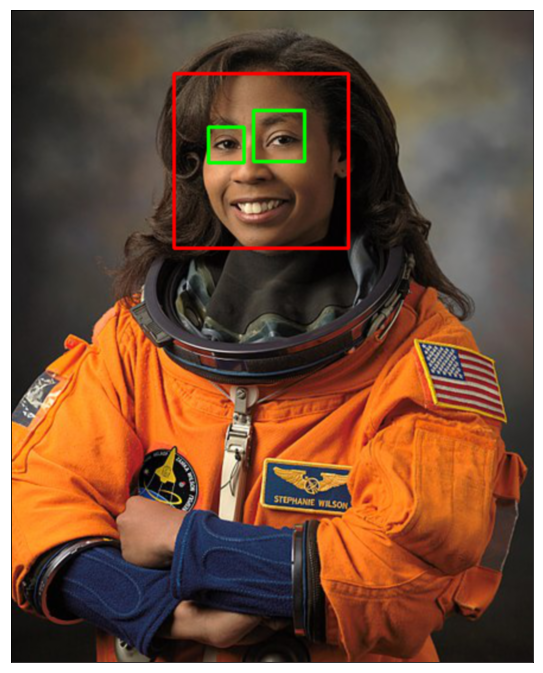

In [36]:
#convert to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#add rectangles to faces found
for (x,y,w,h) in faces:
    cv.rectangle(im,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = im[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

print('Astronaut Stehanie Wilson')
plt.figure(figsize=(12,12))
plt.imshow(im, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([])
plt.yticks([])
plt.show()

# <font color=purple>Control hardware and software</font>

__Computer Graphics, 3D Art__<br>
Wayfair's 3D API! Availabe for this hackathon! https://documenter.getpostman.com/view/427064/RWgqVK43<br>
Blender: https://docs.blender.org/api/current/<br>
3ds Max: http://docs.autodesk.com/3DSMAX/16/ENU/3ds-Max-Python-API-Documentation/index.html<br>

__Home Automation/Voice Assistants__<br>
Google Assistant: https://developers.google.com/assistant/sdk/guides/library/python/<br>
Alexa Skills: https://developer.amazon.com/docs/sdk/alexa-skills-kit-sdk-for-python.html<br>
Chromecast: https://github.com/balloob/pychromecast<br>
Hue and other smart, color-changing lightbulbs<br>

IFTTT to send alerts to your phone: https://medium.com/mai-piu-senza/connect-a-python-script-to-ifttt-8ee0240bb3aa<br>

11 examples of things you can do with Python: https://realpython.com/what-can-i-do-with-python/


# <font color=purple>How is Python used by companies?</font>

Responses from Wayfair employees about how they use Python at work:<br>
__Operations Research Team__<br>
We use Python to create optimization models to improve Wayfair's logistics.

Commonly used Libraries<br>
typing<br>
datetime<br>
hypothesis<br>
logging<br>
collections<br>
itertools<br>
pytest<br>

__Data Science__<br>
We use python to explore data sets, process images, and train machine learning models.

Commonly used Libraries<br>
Pandas<br>
NumPy<br>
matplotlib<br>
TensorFlow<br>

__Search Tech Engineering__<br>
We use Python as a query preprocessor to discover search intent, to process large amounts of data (for example building out our predictive suggestions), to discover spelling suggestions, and others

__Order Processing Performance Engineering__<br>
We use python for high concurrency, threaded order processing w/ sub processes.

Examples of other companies using Python: https://www.netguru.com/blog/8-top-companies-that-use-python-for-their-apps-examples-of-top-notch-python-applications